In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import pandas as pd


file = open('timeseries_aal.csv', 'rb')
data = np.loadtxt(file, delimiter = ",")
rows, cols = np.shape(data)
x = np.arange(0, cols)
brain_region = np.arange(0,rows)


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
kmeans = KMeans(n_clusters = 7)
y_predicted = kmeans.fit_predict(data)
y_predicted

array([5, 5, 0, 3, 6, 6, 3, 3, 6, 6, 5, 3, 3, 3, 6, 6, 5, 5, 5, 5, 0, 0,
       3, 3, 4, 3, 0, 0, 5, 5, 3, 3, 5, 5, 3, 5, 0, 0, 0, 0, 5, 0, 1, 1,
       4, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 5, 5, 4, 6, 6, 5, 3, 5, 6, 3,
       4, 6, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 0, 3,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 5, 0, 0, 1, 1,
       1, 1, 1, 0, 5, 2])

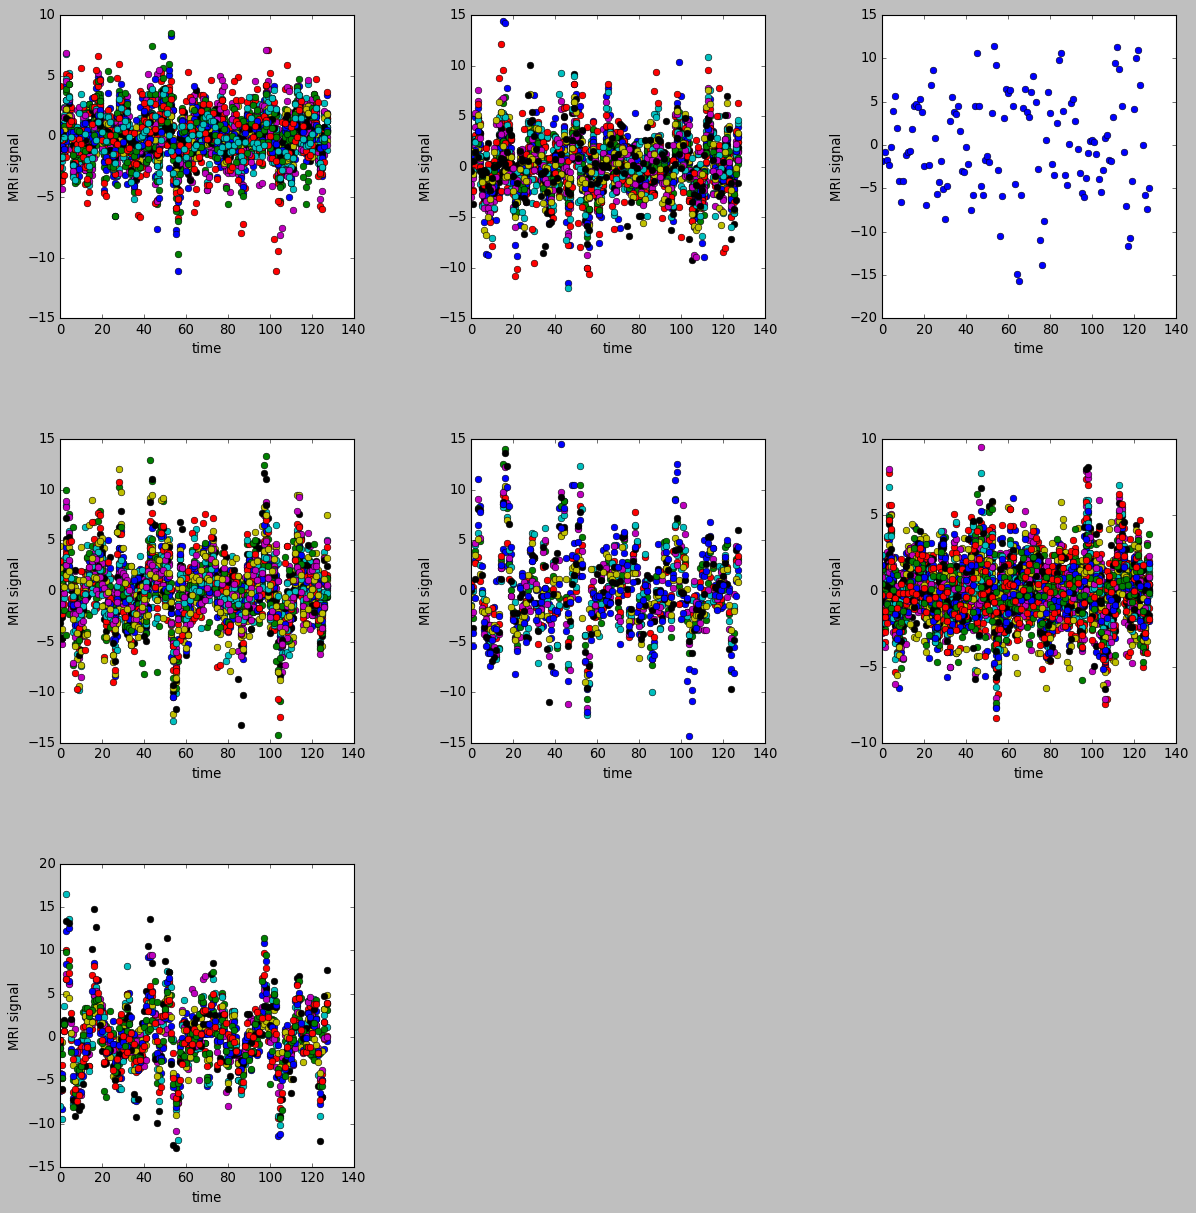

In [3]:
fig, ax = plt.subplots(figsize=(18,18))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(rows):
    plt.subplot(3,3, y_predicted[i] + 1)
    plt.plot(x, data[i], marker = 'o', linestyle='', markersize = 6)
    plt.xlabel('time')
    plt.ylabel('MRI signal')

    

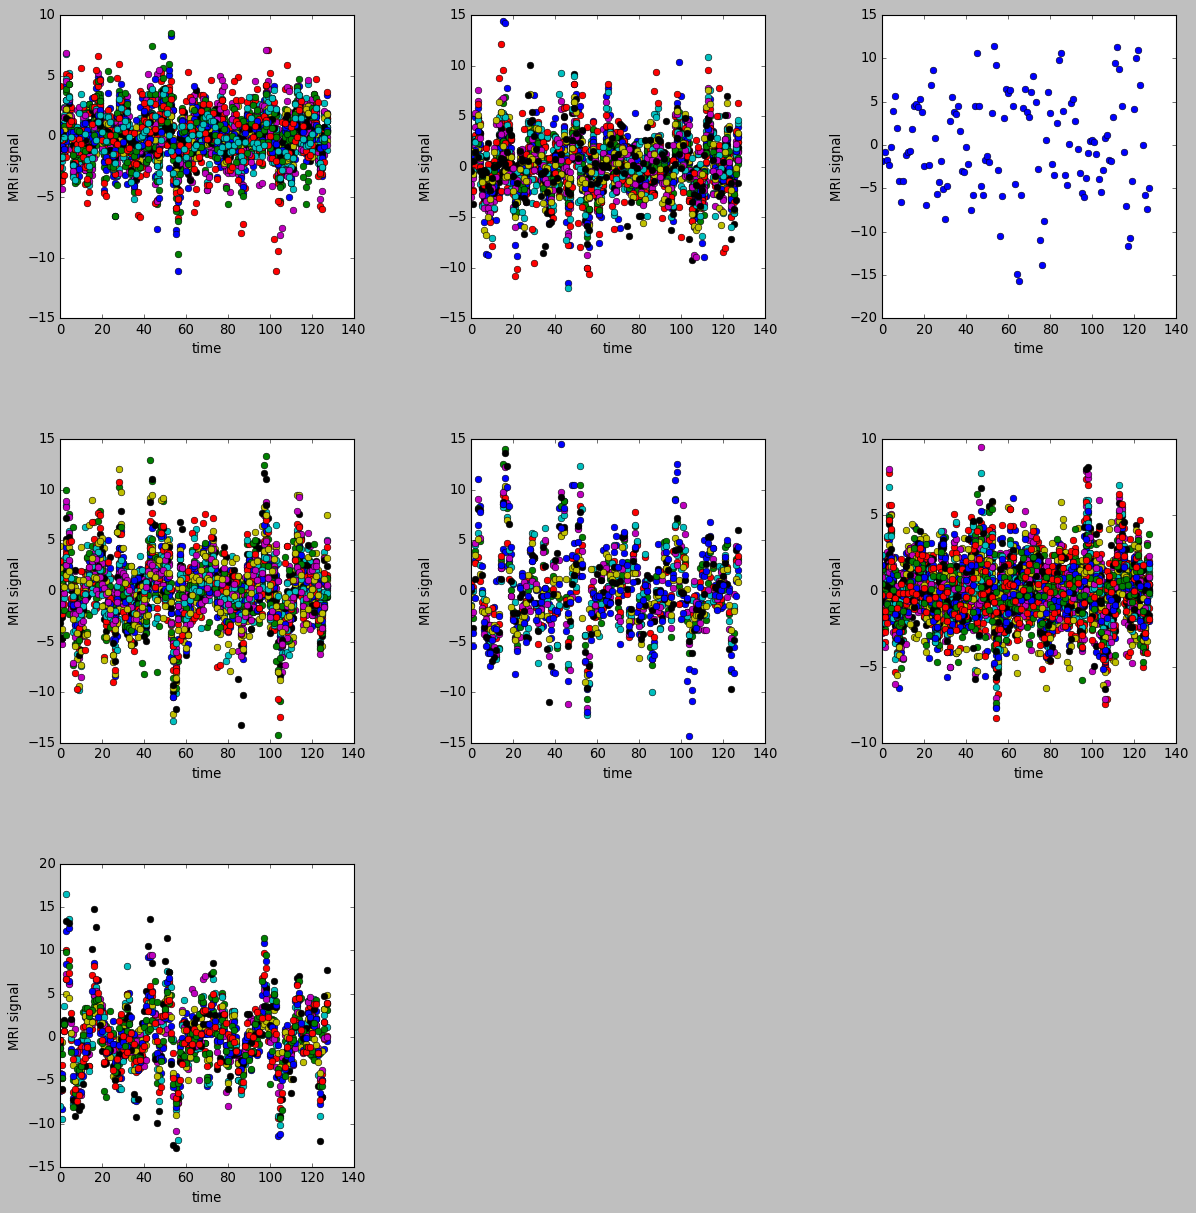

In [4]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 7).fit(data)
all_labels = gmm.predict(data)
probs = gmm.predict_proba(data)
size = 6 * probs.max(1) ** 2

fig, ax = plt.subplots(figsize=(18,18))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i in range(rows):
    plt.subplot(3,3, y_predicted[i] + 1)
    plt.plot(x, data[i], marker = 'o', linestyle='', markersize = size[i])
    plt.xlabel('time')
    plt.ylabel('MRI signal')

Text(156.0, 0.5, 'Brain regions')

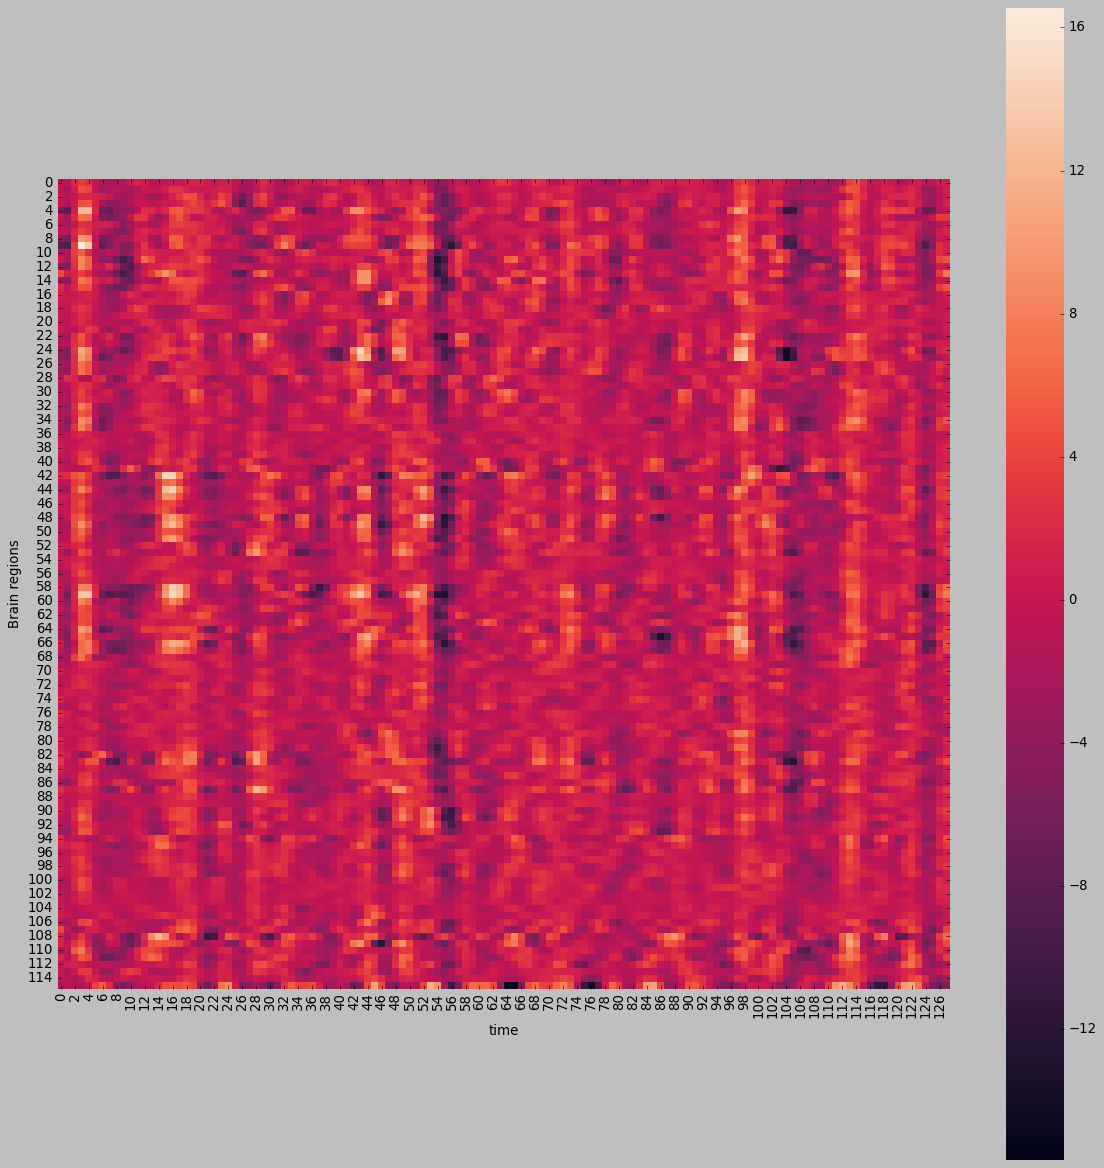

In [81]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(18,18))
sns.heatmap(data, square = True, cbar=True)
plt.xlabel('time')
plt.ylabel('Brain regions')



In [186]:
y_predicted


array([5, 5, 0, 3, 6, 6, 3, 3, 6, 6, 5, 3, 3, 3, 6, 6, 5, 5, 5, 5, 0, 0,
       3, 3, 4, 3, 0, 0, 5, 5, 3, 3, 5, 5, 3, 5, 0, 0, 0, 0, 5, 0, 1, 1,
       4, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 5, 5, 4, 6, 6, 5, 3, 5, 6, 3,
       4, 6, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 0, 3,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 5, 0, 0, 1, 1,
       1, 1, 1, 0, 5, 2])

In [113]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 =[]
cluster5 = []
cluster6=[]
cluster7 = []

for i in range(rows):
    if y_predicted[i]==0:
        cluster1.append(data[i])
    elif y_predicted[i]==1:
        cluster2.append(data[i])
    elif y_predicted[i]==2:
        cluster3.append(data[i])
    elif y_predicted[i]==3:
        cluster4.append(data[i])
    elif y_predicted[i]==4:
        cluster5.append(data[i])
    elif y_predicted[i]==5:
        cluster6.append(data[i])
    elif y_predicted[i]==6:
        cluster7.append(data[i])

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)
cluster4 = np.array(cluster4)
cluster5 = np.array(cluster5)
cluster6 = np.array(cluster6)
cluster7 = np.array(cluster7)
cluster3.shape

(1, 128)

Text(156.0, 0.5, 'Brain region')

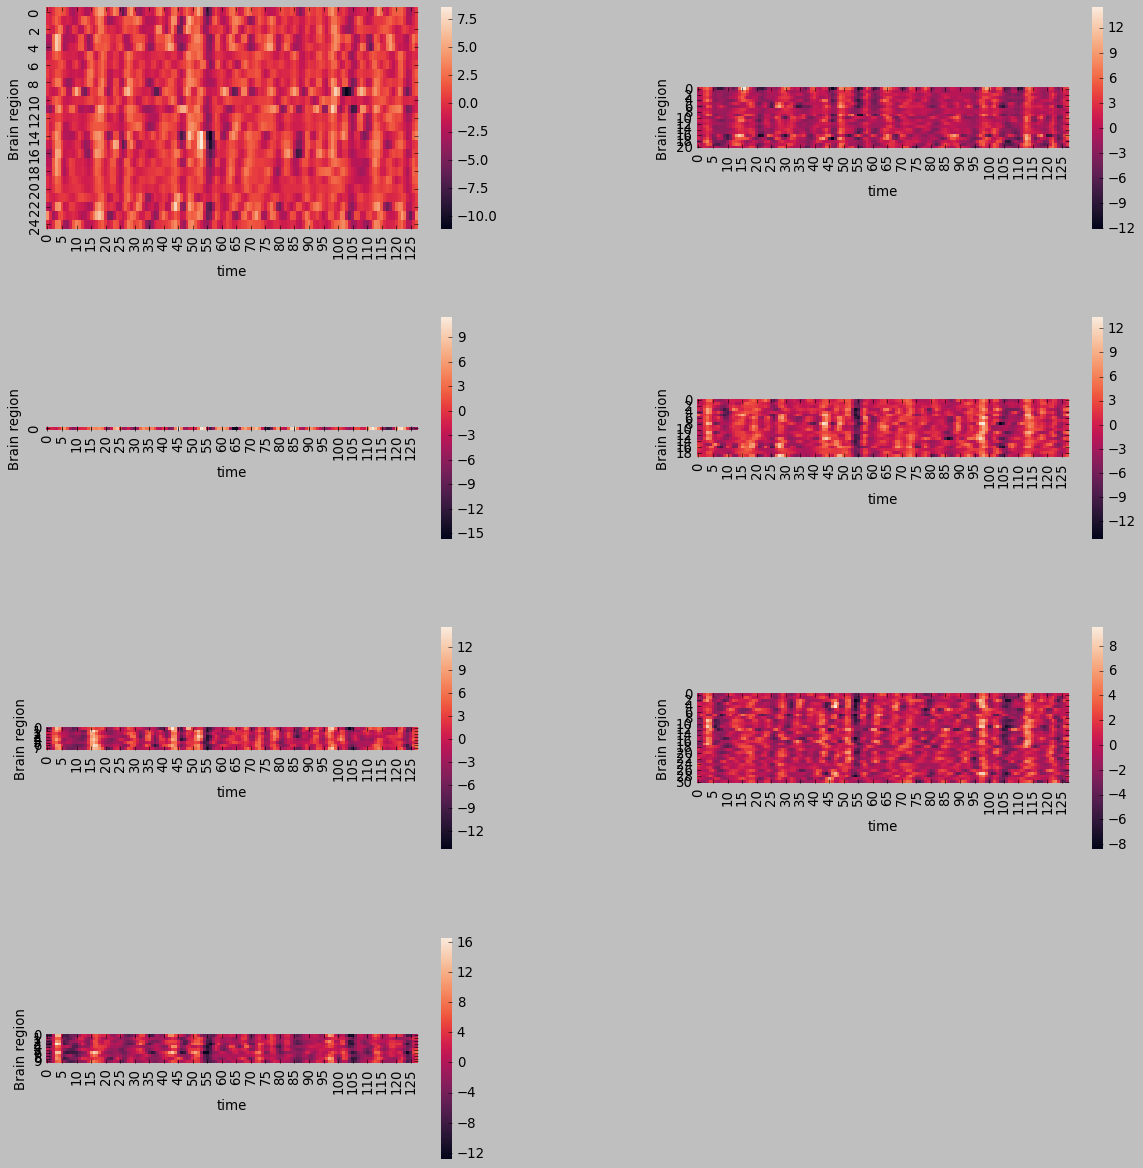

In [122]:
fig, ax = plt.subplots(figsize=(18,18))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)


plt.subplot(4,2, 1)
sns.heatmap(cluster1)
plt.xlabel('time')
plt.ylabel('Brain region')
plt.subplot(4,2, 2)
sns.heatmap(cluster2, square = True, cbar = True)
plt.xlabel('time')
plt.ylabel('Brain region')
plt.subplot(4,2, 3)
sns.heatmap(cluster3, cbar = True, square = True)
plt.xlabel('time')
plt.ylabel('Brain region')
plt.subplot(4,2, 4)
sns.heatmap(cluster4, cbar = True, square = True)
plt.xlabel('time')
plt.ylabel('Brain region')
plt.subplot(4,2, 5)
sns.heatmap(cluster5, cbar = True, square = True)
plt.xlabel('time')
plt.ylabel('Brain region')
plt.subplot(4,2, 6)
sns.heatmap(cluster6, cbar = True, square = True)
plt.xlabel('time')
plt.ylabel('Brain region')
plt.subplot(4,2, 7)
sns.heatmap(cluster7, cbar = True, square = True)
plt.xlabel('time')
plt.ylabel('Brain region')

In [123]:
new_data = pd.DataFrame(data)

In [126]:
new_data['cluster'] = y_predicted


In [151]:
clustered_data = pd.DataFrame(new_data[new_data.cluster == 0])
for i in range(0,6):
    clustered_data = pd.concat([clustered_data, new_data[new_data.cluster == i+1]])
clustered_data.pop('cluster')
clustered_data.shape

(116, 128)

Text(156.0, 0.5, 'Brain regions')

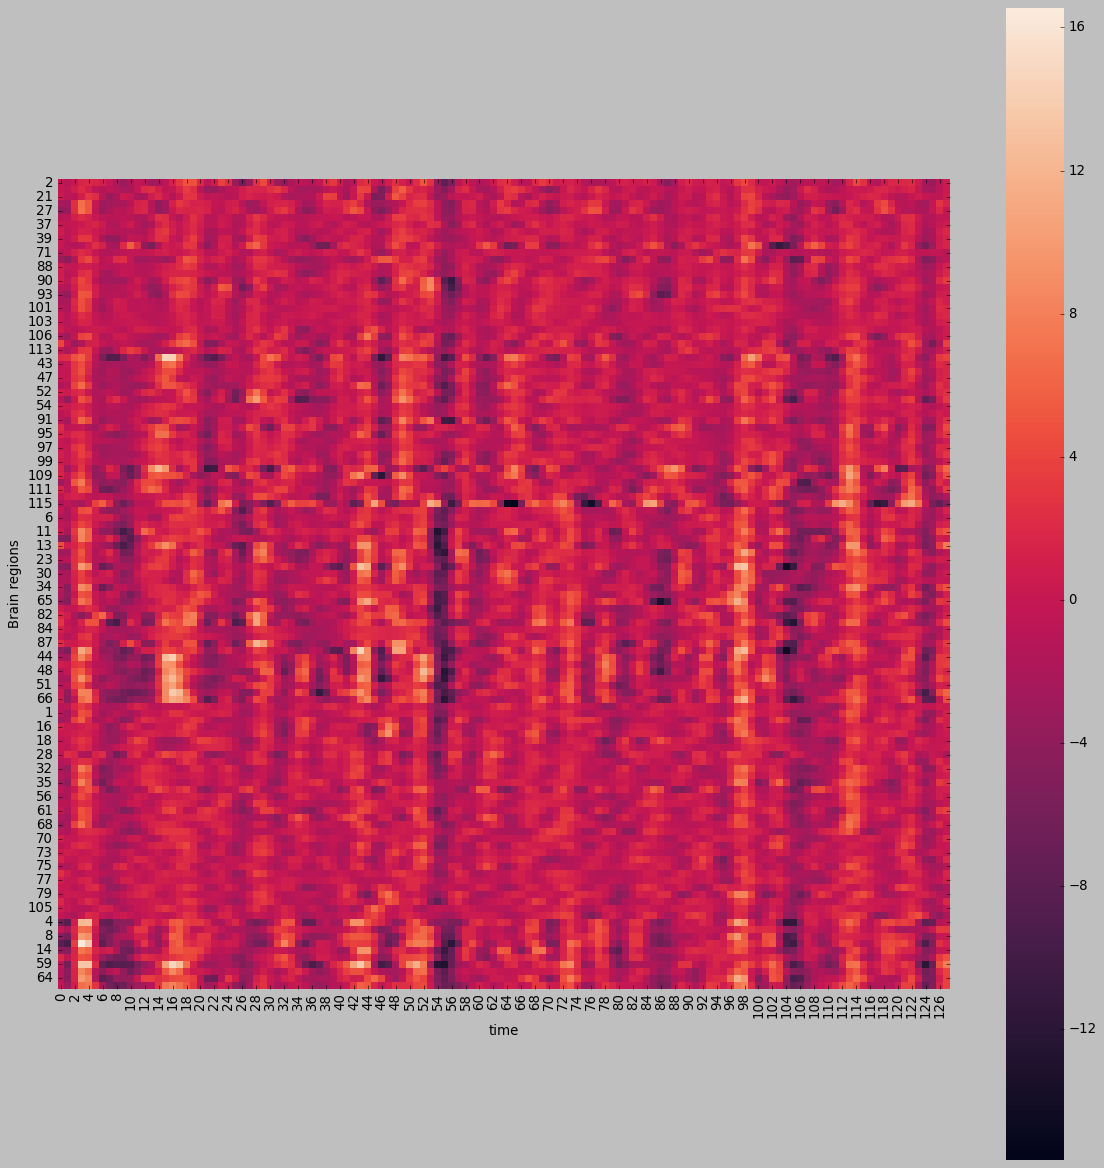

In [153]:
fig,ax = plt.subplots(figsize=(18,18))
sns.heatmap(clustered_data, square = True, cbar=True)
plt.xlabel('time')
plt.ylabel('Brain regions')

In [156]:
from sklearn.metrics import silhouette_samples, silhouette_score


In [197]:
silhouette_avg = silhouette_score(data, y_predicted)
print("7 clusters had the silhouette score of", silhouette_avg)

7 clusters had the silhouette score of 0.059985346234091005


In [196]:
for i in range(2, 13):
    new_clusters = KMeans(n_clusters = i)
    new_labels = new_clusters.fit_predict(data)
    silhouette_avg = silhouette_score(data, new_labels)
    
    print(i, "clusters Sil. Score is: ", silhouette_avg)
    
    

2 clusters Sil. Score is:  0.23235536331563283
3 clusters Sil. Score is:  0.07919113628526055
4 clusters Sil. Score is:  0.11322129639255064
5 clusters Sil. Score is:  0.10440920122078072
6 clusters Sil. Score is:  0.09392960104895973
7 clusters Sil. Score is:  0.07461253662696138
8 clusters Sil. Score is:  0.08629490468395822
9 clusters Sil. Score is:  0.09934647695494381
10 clusters Sil. Score is:  0.10439902041452045
11 clusters Sil. Score is:  0.09491201232651983
12 clusters Sil. Score is:  0.08748581073115692


array([0.])

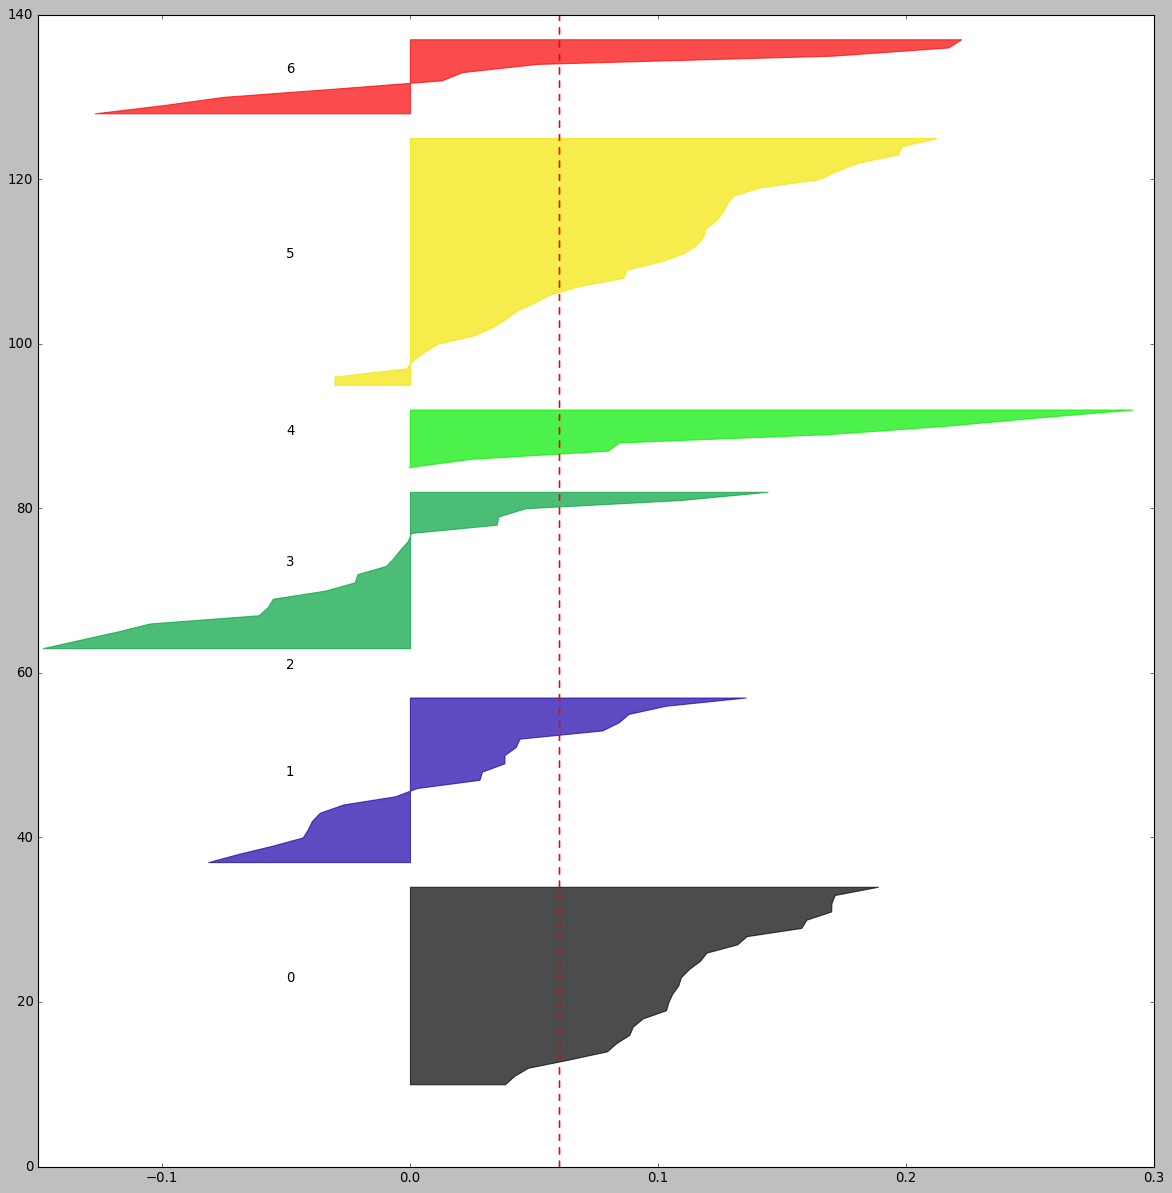

In [199]:
import matplotlib.cm as cm
silhouette_avg = silhouette_score(data, y_predicted)
fig,ax = plt.subplots(figsize= (18,18))
sample_s_values = silhouette_samples(data, y_predicted)
y_lower = 10
for i in range(7):
    ith_values = sample_s_values[y_predicted == i]
    ith_values.sort()
    size_i = ith_values.shape[0]
    y_upper = y_lower + size_i
    color = cm.nipy_spectral(float(i) / 7)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_values,
                    facecolor= color,
                    edgecolor=color,
                    alpha = 0.7)
    ax.text(-0.05, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 2
    ax.axvline(x = silhouette_avg, color = 'red', linestyle="--" )


temp = sample_s_values[y_predicted == 2]
temp
 